In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

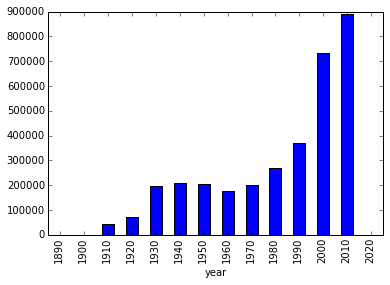

In [9]:
c = cast
c.groupby(c.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

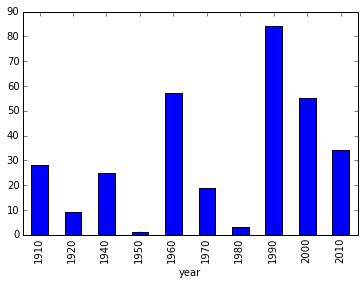

In [10]:
c = cast[cast.title == 'Hamlet']
c.groupby(c.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [12]:
c = cast[cast.n == 1]
c = c[c.year // 10 == 195]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    274
1951  actor      632
      actress    273
1952  actor      592
      actress    285
1953  actor      634
      actress    291
1954  actor      628
      actress    297
1955  actor      608
      actress    265
1956  actor      616
      actress    288
1957  actor      705
      actress    284
1958  actor      694
      actress    276
1959  actor      679
      actress    289
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [15]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n <= 5]
c.groupby(['year', 'type']).size()


year  type   
1950  actor      2587
      actress    1460
1951  actor      2747
      actress    1470
1952  actor      2599
      actress    1502
1953  actor      2737
      actress    1570
1954  actor      2622
      actress    1504
1955  actor      2585
      actress    1488
1956  actor      2624
      actress    1518
1957  actor      2886
      actress    1671
1958  actor      2862
      actress    1643
1959  actor      2804
      actress    1630
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [40]:
c = cast
c = c[c.title == 'The Pink Panther'].sort('year')
c.groupby('year')[['n']].max()


,n
year,
1963,15
2006,50
2016,NaN


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [48]:
c = cast
c = c[c.name == 'Frank Oz'].sort('year')
h = c.groupby(['year', 'title']).size()
h[h > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [5]:
c = cast
c = c[c.name == 'Frank Oz'].sort('year')
h = c.groupby(['character']).size()
h[h > 2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Miss Piggy        6
Sam the Eagle     5
Yoda              5
dtype: int64